In [5]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np

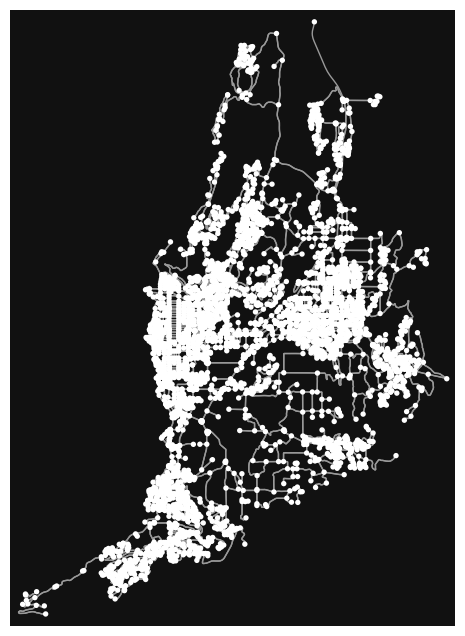

In [2]:
H = ox.graph_from_place("Kelowna, Canada", network_type="drive")
fig, ax = ox.plot_graph(H)

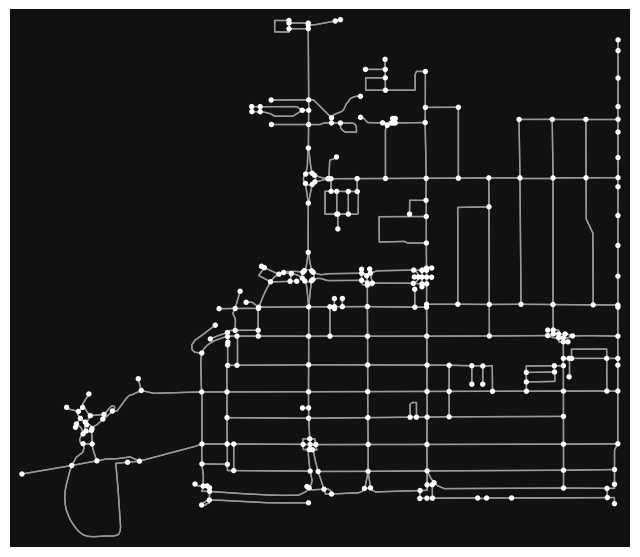

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [6]:
# Defining the map boundaries 
#north, east, south, west = 49.9049238, -119.4543568, 49.8461362, -119.5047125
north, east, south, west = 49.8916962, -119.4884523, 49.8834416, -119.5047125
# Downloading the map as a graph object 
kelowna_G = ox.graph_from_bbox(north, south, east, west, network_type = 'walk')  
# Plotting the map graph 
ox.plot_graph(kelowna_G)

In [7]:
kelowna_G.number_of_nodes(),kelowna_G.number_of_edges()

(302, 850)

In [14]:
edges = ox.graph_to_gdfs(kelowna_G, nodes=False, edges=True)
# edges
# edges_series = edges['length'] #gives you a pandas series with edge lengths
edges[['osmid','length']] #gives you a pandas dataframe with osmids of edges and their corresponding lengths

osmid   length
u           v          key                                 
355377664   2742445757 0                  31754193   60.051
            355377951  0                 100577419   73.357
            2367768318 0    [128070577, 969983956]   87.515
355377709   4757605586 0                 846929817   54.433
            8044344509 0                 919464719   54.577
...                                            ...      ...
9884241022  8072927121 0                1078096002    8.293
            4003592525 0                1078096003   12.265
10295505569 1173428791 0                  31754226  183.617
            355378187  0                  31754226   54.454
            1173428778 0                 676314907  240.817

[850 rows x 2 columns]

In [15]:
length_weight = list(edges['length'])
len(length_weight)

850

In [16]:
edges_list = list(kelowna_G.edges())

nodes_list= []
for edge in edges_list:
    x,y = edge[0],edge[1]
    nodes_list.append(x)
    nodes_list.append(y)

len(nodes_list)

1700

In [17]:
nodesNumber = kelowna_G.number_of_nodes()

nodes_set = set(nodes_list)
reverse_nodes_dict = dict(enumerate(nodes_set))
nodes_dict = dict(zip(nodes_set,range(0,nodesNumber)))
# reverse_nodes_dict
nodes_dict

{355377664: 0,
 8065990145: 1,
 8065990146: 2,
 8065990147: 3,
 8065990148: 4,
 8065990149: 5,
 355378182: 6,
 8065990150: 7,
 2727714822: 8,
 2727714825: 9,
 8065990151: 10,
 355378187: 11,
 8976144907: 12,
 8976144908: 13,
 2727714832: 14,
 2727714834: 15,
 2727714837: 16,
 356386839: 17,
 2727714840: 18,
 4003592343: 19,
 356386842: 20,
 3335604253: 21,
 356386846: 22,
 3335604255: 23,
 8067311136: 24,
 8067311137: 25,
 3335604257: 26,
 3335604259: 27,
 1182749220: 28,
 1173428773: 29,
 3104566822: 30,
 3104566823: 31,
 1182749222: 32,
 8067311143: 33,
 1173428778: 34,
 8067311145: 35,
 3335604262: 36,
 355377709: 37,
 2727786542: 38,
 355377711: 39,
 2727786543: 40,
 1182749233: 41,
 1416086066: 42,
 2727786546: 43,
 2727786547: 44,
 4003592344: 45,
 7222265903: 46,
 1173428791: 47,
 5327983315: 48,
 8072919615: 49,
 4757605573: 50,
 8072919616: 51,
 8067311170: 52,
 8067311171: 53,
 8066230453: 54,
 1182749256: 55,
 4757605575: 56,
 1416086091: 57,
 4757605576: 58,
 1416086097: 59

In [18]:
new_edges_list = []
for edge in edges_list:
    x,y= edge[0],edge[1]
    newX,newY= nodes_dict[x],nodes_dict[y]
    new_edge = (newX, newY)
    new_edges_list.append(new_edge)
new_edges_list

[(0, 131),
 (0, 201),
 (0, 183),
 (37, 151),
 (37, 130),
 (37, 6),
 (37, 280),
 (39, 143),
 (39, 285),
 (39, 118),
 (195, 214),
 (195, 301),
 (195, 64),
 (197, 301),
 (197, 226),
 (197, 31),
 (197, 150),
 (201, 166),
 (201, 0),
 (201, 222),
 (201, 176),
 (206, 152),
 (206, 153),
 (206, 210),
 (206, 215),
 (210, 166),
 (210, 206),
 (210, 240),
 (210, 170),
 (214, 120),
 (214, 298),
 (214, 195),
 (215, 206),
 (215, 155),
 (215, 150),
 (215, 151),
 (221, 256),
 (221, 170),
 (221, 267),
 (221, 1),
 (222, 84),
 (222, 201),
 (222, 85),
 (222, 101),
 (226, 71),
 (226, 152),
 (226, 197),
 (226, 115),
 (228, 115),
 (228, 116),
 (228, 125),
 (228, 111),
 (228, 110),
 (229, 194),
 (229, 209),
 (229, 200),
 (232, 29),
 (232, 218),
 (232, 213),
 (232, 198),
 (233, 182),
 (233, 262),
 (233, 70),
 (235, 114),
 (235, 108),
 (235, 299),
 (251, 295),
 (251, 297),
 (251, 126),
 (256, 230),
 (256, 221),
 (256, 132),
 (261, 209),
 (261, 38),
 (261, 220),
 (261, 42),
 (263, 241),
 (263, 277),
 (263, 258),
 

In [19]:
weight_length = list(edges['length'])
new_edges_list_weight = [list(i) for i in new_edges_list]
for x in range(0,len(new_edges_list_weight)):
    new_edges_list_weight[x].append(length_weight[x])
new_edges_list_with_weight = [tuple(ele) for ele in new_edges_list_weight]
new_edges_list_with_weight

[(0, 131, 60.051),
 (0, 201, 73.357),
 (0, 183, 87.51499999999999),
 (37, 151, 54.433),
 (37, 130, 54.577),
 (37, 6, 117.62499999999999),
 (37, 280, 111.378),
 (39, 143, 54.497),
 (39, 285, 85.385),
 (39, 118, 41.89),
 (195, 214, 99.275),
 (195, 301, 102.17099999999999),
 (195, 64, 49.937),
 (197, 301, 256.796),
 (197, 226, 110.572),
 (197, 31, 49.727),
 (197, 150, 51.474000000000004),
 (201, 166, 47.516),
 (201, 0, 73.357),
 (201, 222, 97.81099999999999),
 (201, 176, 114.27),
 (206, 152, 48.926),
 (206, 153, 50.260999999999996),
 (206, 210, 111.351),
 (206, 215, 111.559),
 (210, 166, 153.5),
 (210, 206, 111.351),
 (210, 240, 30.313),
 (210, 170, 50.728),
 (214, 120, 20.612),
 (214, 298, 48.614),
 (214, 195, 99.275),
 (215, 206, 111.559),
 (215, 155, 41.554),
 (215, 150, 48.227),
 (215, 151, 49.605),
 (221, 256, 94.62700000000001),
 (221, 170, 53.741),
 (221, 267, 55.263999999999996),
 (221, 1, 40.157000000000004),
 (222, 84, 47.416),
 (222, 201, 97.81099999999999),
 (222, 85, 122.0080

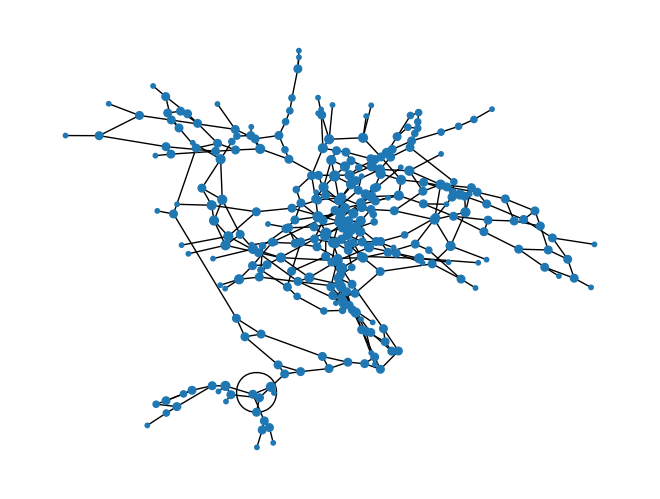

In [20]:
G = nx.Graph()
G.add_weighted_edges_from(new_edges_list_with_weight)
d = dict(G.degree)
d.keys()
# nx.draw(G, with_labels=True, node_size=d)
# nx.draw(G)
# nx.draw(G, with_labels=True, nodelist=list(d.keys()), node_size=[v * 50 for v in d.values()])
nx.draw(G, nodelist=list(d.keys()), node_size=[v * 10 for v in d.values()])

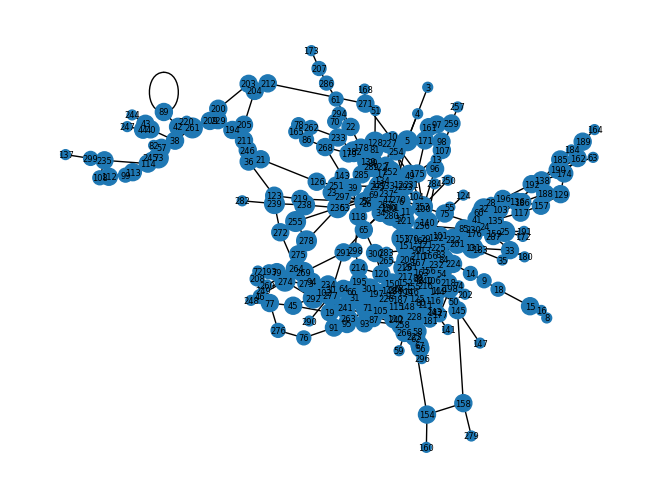

In [21]:
nx.draw(G, with_labels=True,font_size=6,nodelist=list(d.keys()), node_size=[v * 50 for v in d.values()])

In [23]:
# define origin and desination locations 
# origin_point = (49.9049238, -119.4543568)
# destination_point = (49.8461362, -119.5047125)
origin_point = (49.883911, -119.5018168) 
destination_point = (49.8871646, -119.4945047)
# get the nearest nodes to the locations 
origin_node = ox.distance.nearest_nodes(kelowna_G, origin_point[1], origin_point[0]) 
destination_node = ox.distance.nearest_nodes(kelowna_G, destination_point[1], destination_point[0])
# printing the closest node id to origin and destination points 
print(origin_node, destination_node)
print(nodes_dict[origin_node], nodes_dict[destination_node])

1182749233 1162896325
41 278


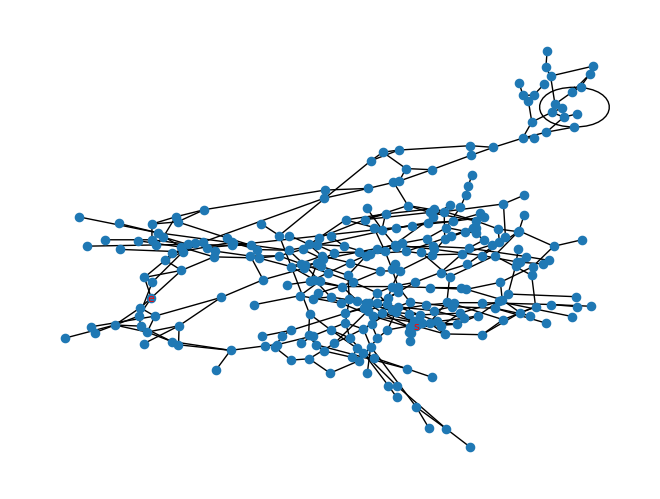

In [24]:
labels = {}    
for node in G.nodes():
    if node==nodes_dict[origin_node]:
        #set the node name as the key and the label as its value 
        labels[node] = 's'
    if node==nodes_dict[destination_node]:
        labels[node] = 'e'
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, labels=labels, font_size=8, font_color='r', node_size=35)

In [25]:
# Run the dijkstra's search algorithm to find the lowest-cost (shortest-length) path
# You are encouraged to use other search algorithms to find paths and compare the differences among different algorithms

from search_algs import dijkstra

start_node = nodes_dict[origin_node]
end_node = nodes_dict[destination_node]
trace = dijkstra(G, start_node, end_node)
trace

([41,
  103,
  186,
  157,
  117,
  135,
  176,
  201,
  0,
  131,
  33,
  287,
  230,
  24,
  270,
  237,
  295,
  251,
  297,
  23,
  26,
  27,
  219,
  238,
  255,
  278],
 800.5190000000001)

In [26]:
# Define the function to plot the path on map

import plotly.graph_objects as go
import numpy as np

def plot_path(lat, long, origin_point, destination_point):
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name="Path",
        mode="lines",
        lon=long,
        lat=lat,
        marker={'size': 10},
        line=dict(width=4.5, color='blue')))
    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name="Source",
        mode="markers",
        lon=[origin_point[1]],
        lat=[origin_point[0]],
        marker={'size': 12, 'color': "red"}))

    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name="Destination",
        mode="markers",
        lon=[destination_point[1]],
        lat=[destination_point[0]],
        marker={'size': 12, 'color': 'green'}))

    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
                      mapbox_center_lat=30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0},
                      mapbox={
                          'center': {'lat': lat_center,
                                     'lon': long_center},
                          'zoom': 13})
    fig.show()

In [27]:
# plot the found paths on map 
steps = trace[0]
path = [reverse_nodes_dict[r] for r in steps]
long = [] 
lat = []  
for i in path:
    point = kelowna_G.nodes[i]
    long.append(point['x'])
    lat.append(point['y'])

plot_path(lat, long, origin_point, destination_point)